<div align="center">

<!-- Logo -->
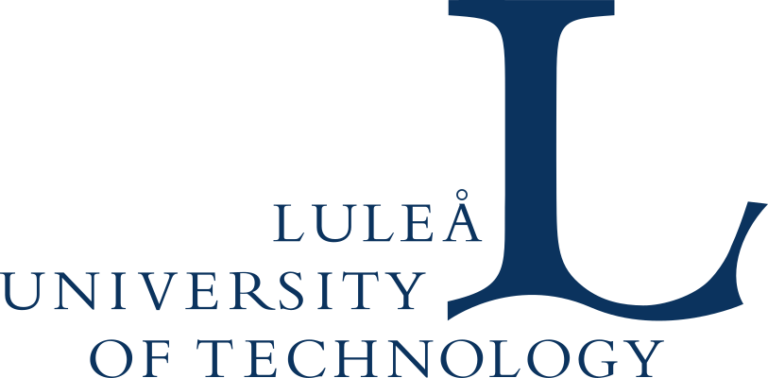

<!-- Title -->
  <h1>📊 Assignment 5: Railways Lidar Spatial Data Analytics</h1>

  <!-- Author -->
  <h4>👤 Author: Hamed Talebi</h4>

  <!-- Optional Date/Course -->
  <p><em>Date: August 28, 2025  |  Course: Industrial AI and eMaintenance - Part I: Theories & Concepts D7015B 55031 VT2025</em></p>

  <!-- Divider -->
  <hr style="width:60%; border-top:1px solid #ccc; margin-top:1em;"/>

</div>


point cloud data is stored as a 2D matrix
each row has 3 values i.e. the x, y, z value for a point

Project has to be submitted to github in the private folder assigned to you
Readme file should have the numerical values as described in each task
Create a folder to store the images as described in the tasks.

Try to create commits and version for each task.

In [2]:
# Import Libraries
import matplotlib
import numpy as np
from scipy.spatial import KDTree
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Utility Functions
def show_cloud(points_plt, save_path=None,  figsize=(5, 5), dpi=150, point_size=0.05):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points_plt[:, 0], points_plt[:, 1], points_plt[:, 2], s=point_size)
    ax.set_box_aspect([1, 1, 1])
    plt.tight_layout()
    plt.title('3D Scatterplot from x, y, and z')
    if save_path:
      plt.savefig(save_path, dpi=300)
    plt.show()

def show_scatter(x,y):
    plt.scatter(x, y)
    plt.show()

def get_ground_level(pcd):
    return 64

(72067, 3)


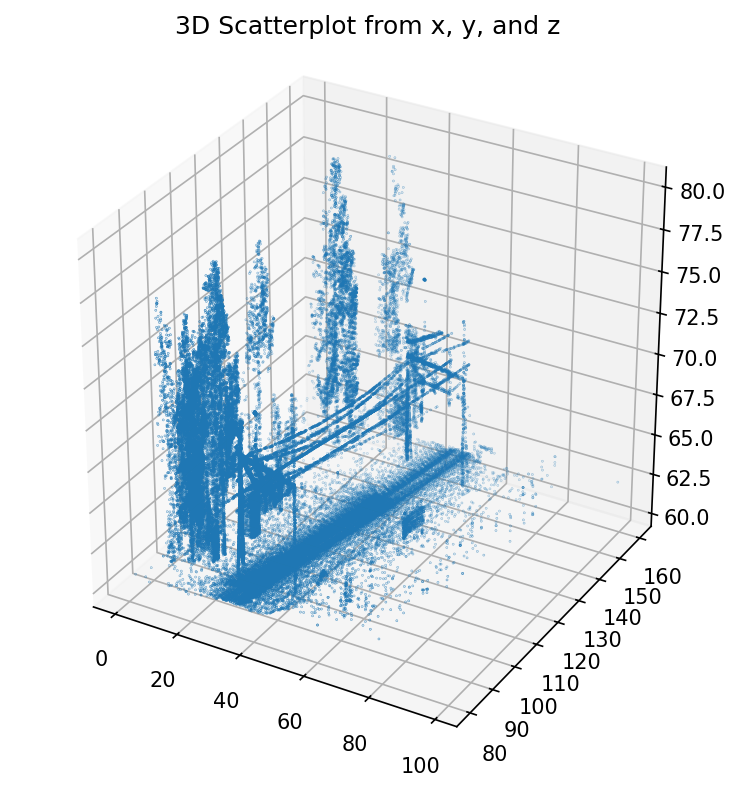

In [ ]:
# Read file containing point cloud data
pcd = np.load("dataset1.npy")
print(pcd.shape)


# Show downsampled data in external window
show_cloud(pcd)
# show_cloud(pcd[::10]) # keep every 10th point

# Task 1 (3)
* find the best value for the ground level
* One way to do it is useing a histogram
np.histogram
* update the function get_ground_level() with your changes

## Submission
For both the datasets:
* Report the ground level in the readme file in your github project
* Add the histogram plots to your project readme


## Step 1: Study Histogram
Prior to selecting the ground level, we examined histograms for Datasets 1 and 2 and evaluated the mode, mean, and median to determine which statistic yielded the best result.

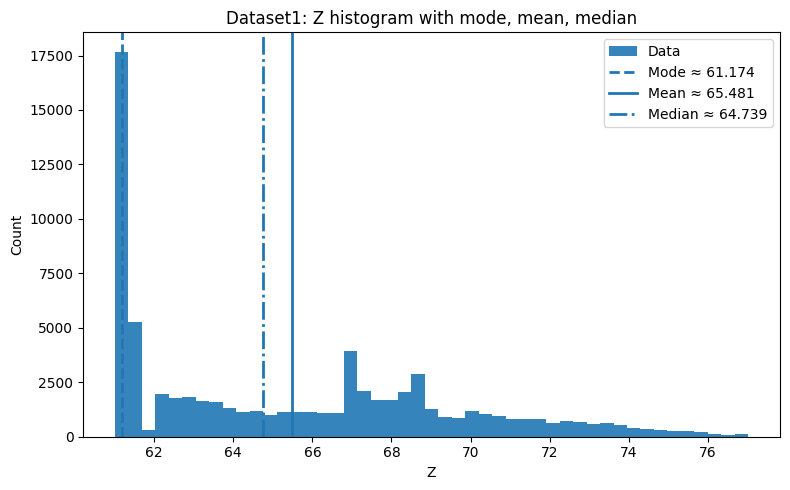

Z stats -> mean: 65.480692, median: 64.739000, mode≈ 61.174436
Mode bin edges: [61.004000, 61.344872], count in mode bin: 17681


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_histogram_with_mode_and_stats(
    pcd,
    col=2,                          # 0->X, 1->Y, 2->Z
    bins="fd",                      # or "auto"
    clip_percentiles=(0.5, 99.5),   # robustly ignore extreme outliers
    title="Histogram with mode, mean, median",
    save_path=None                  # e.g., "images/dataset1_z_hist.jpg"
):
    # Select column and make float
    vals = pcd[:, col].astype(float)

    # Optional robust clipping to reduce outlier influence
    if clip_percentiles is not None:
        lo, hi = np.percentile(vals, clip_percentiles)
        vals = vals[(vals >= lo) & (vals <= hi)]

    # Compute statistics
    mean_val = float(np.mean(vals))
    median_val = float(np.median(vals))

    # Histogram + mode (most frequent bin center)
    counts, edges = np.histogram(vals, bins=bins)
    peak_idx = int(np.argmax(counts))
    mode_center = 0.5 * (edges[peak_idx] + edges[peak_idx + 1])

    # Plot
    plt.figure(figsize=(8, 5))
    plt.hist(vals, bins=edges, alpha=0.9, label="Data")
    plt.axvline(mode_center, linestyle="--", linewidth=2, label=f"Mode ≈ {mode_center:.3f}")
    plt.axvline(mean_val,  linestyle="-",  linewidth=2, label=f"Mean ≈ {mean_val:.3f}")
    plt.axvline(median_val,linestyle="-.", linewidth=2, label=f"Median ≈ {median_val:.3f}")
    plt.title(title)
    plt.xlabel(["X","Y","Z"][col])
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=300)
        plt.show()
        plt.close()
    else:
        plt.show()

    # Print summary
    print(f"{['X','Y','Z'][col]} stats -> mean: {mean_val:.6f}, median: {median_val:.6f}, mode≈ {mode_center:.6f}")
    print(f"Mode bin edges: [{edges[peak_idx]:.6f}, {edges[peak_idx+1]:.6f}], count in mode bin: {counts[peak_idx]}")

    return {
        "mean": mean_val,
        "median": median_val,
        "mode_center": mode_center,
        "mode_bin_edges": (float(edges[peak_idx]), float(edges[peak_idx+1])),
        "mode_count": int(counts[peak_idx])
    }

# Example for Z of dataset1:
pcd = np.load("dataset1.npy")
stats = plot_histogram_with_mode_and_stats(
    pcd, col=2, bins="fd",
    clip_percentiles=(0.5, 99.5),
    title="Dataset1: Z histogram with mode, mean, median",
    save_path="images/dataset1_z_hist.jpg"
)


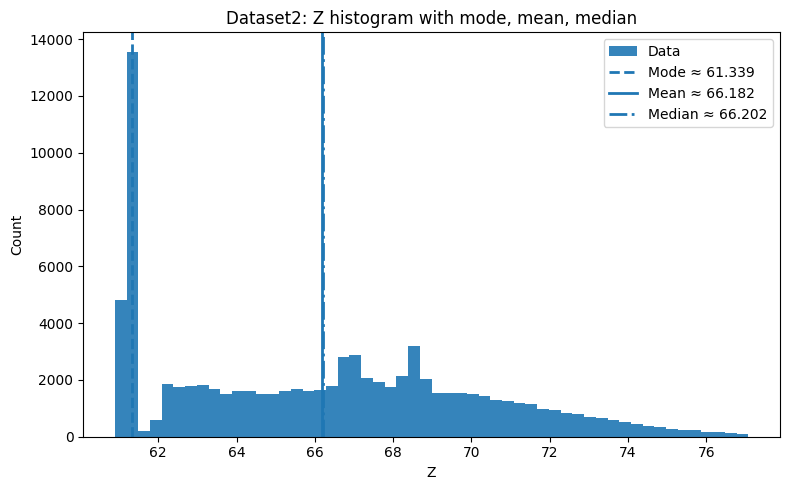

Z stats -> mean: 66.182131, median: 66.202000, mode≈ 61.339500
Mode bin edges: [61.189667, 61.489333], count in mode bin: 13561


In [ ]:
# Example for Z of dataset2:
pcd = np.load("dataset2.npy")
stats = plot_histogram_with_mode_and_stats(
    pcd, col=2, bins="fd",
    clip_percentiles=(0.5, 99.5),
    title="Dataset2: Z histogram with mode, mean, median",
    save_path="images/dataset2_z_hist.jpg"
)

## Step 2: Updating the get_ground_level()
After finding out that (explanation in the report) mean is more suitable to be used as ground level then we update the code to take it so it not only remove the ground but also bushes.

65.5208586454272


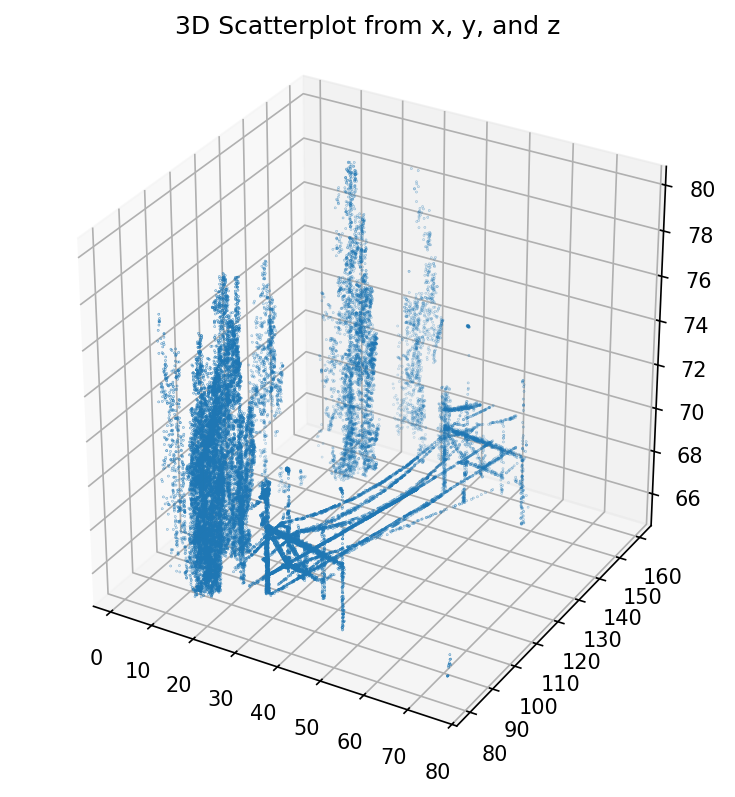

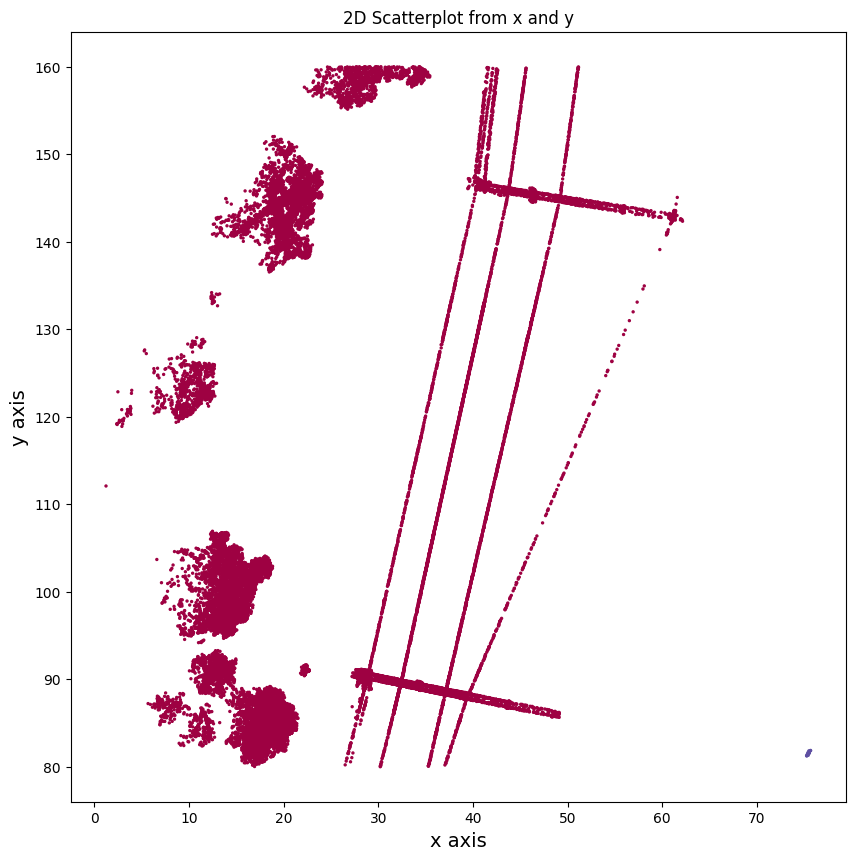

In [ ]:
pcd = np.load("dataset1.npy")

# Updating the function get_ground_level()
def get_ground_level(pcd):
    return float(np.mean(pcd[:, 2]))

est_ground_level = get_ground_level(pcd)
print(est_ground_level)

pcd_above_ground = pcd[pcd[:,2] > est_ground_level]
#%%
pcd_above_ground.shape

#%% side view
show_cloud(pcd_above_ground, "images/mean_as_ground_3d.jpg")


# %%
unoptimal_eps = 10
# find the elbow
clustering = DBSCAN(eps = unoptimal_eps, min_samples=5).fit(pcd_above_ground)

#%%
clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, clusters)]

# %%
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(pcd_above_ground[:,0],
            pcd_above_ground[:,1],
            c=clustering.labels_,
            cmap=matplotlib.colors.ListedColormap(colors),
            s=2)


#plt.title('DBSCAN: %d clusters' % clusters,fontsize=15)
plt.title('2D Scatterplot from x and y')
plt.xlabel('x axis',fontsize=14)
plt.ylabel('y axis',fontsize=14)
plt.savefig("images/mean_as_ground_2d.jpg", dpi=300)
plt.show()

# Task 2 (4)
* Find an optimized value for eps.
* Plot the elbow and extract the optimal value from the plot
* Apply DBSCAN again with the new eps value and confirm visually that clusters are proper

## Submission
For both the datasets:
* Report the optimal value of eps in the Readme to your github project
* Add the elbow plots to your github project Readme
* Add the cluster plots to your github project Readme


Estimated ground level (mean Z): 65.5208586454272
[Elbow] dataset=dataset1, k=8, elbow_idx=32487, eps≈0.870929
Saved elbow plot -> images/dataset1_kdistance_elbow.jpg
[DBSCAN] eps=0.870929, min_samples=8, clusters=48


/tmp/ipython-input-1342905728.py:117: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", max(n_clusters, 1))


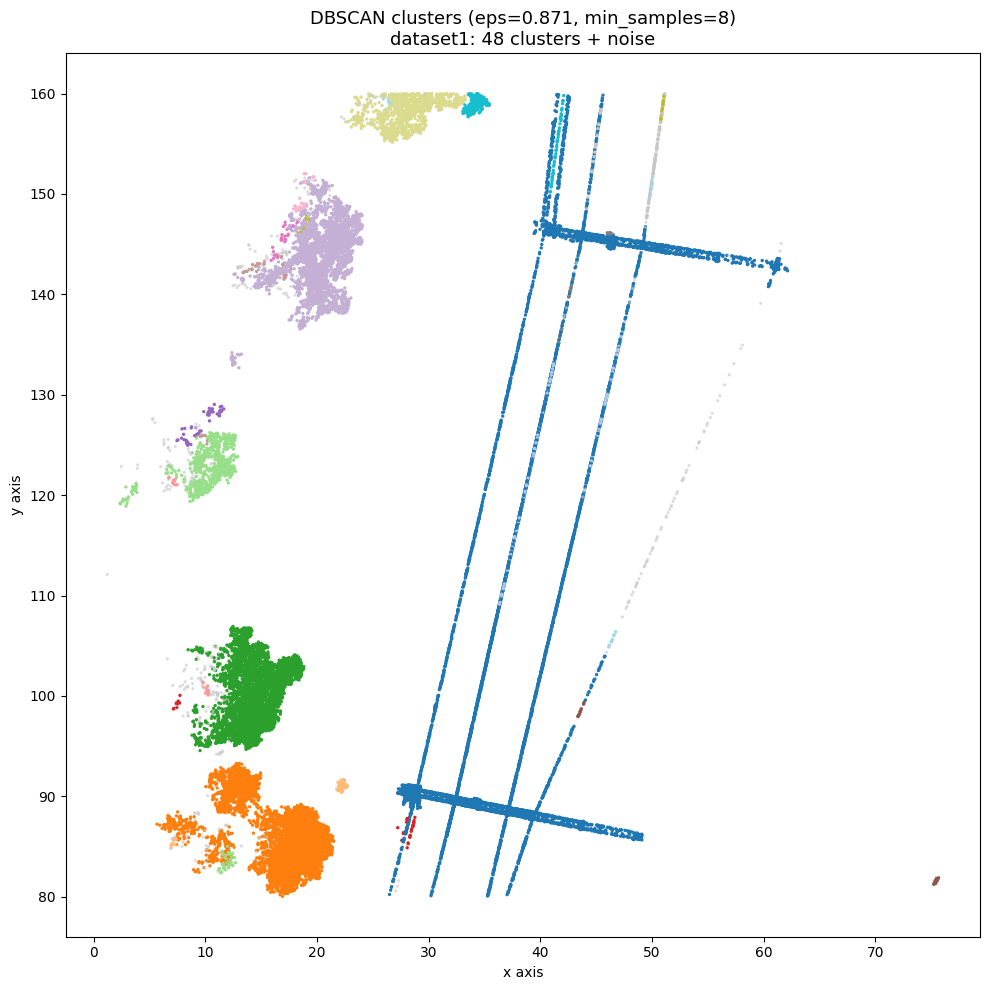

Saved cluster plot -> images/dataset1_dbscan_clusters.jpg


In [15]:
# %% --- Task 2: Optimizing DBSCAN eps via k-distance (elbow) plot ---
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# ------------------------------------------------------------
# Helper: compute and plot k-distance curve and pick elbow
# ------------------------------------------------------------
def kdistance_elbow(points, k=8, dataset_name="dataset1", save_dir="images"):
    """
    Compute the k-distance (distance to the k-th nearest neighbor) for each point,
    pick the 'elbow' index using the max-distance-to-chord heuristic, and save the plot.

    Returns
    -------
    eps_opt : float
        Estimated optimal epsilon for DBSCAN.
    k_dist_sorted : ndarray, shape (N,)
        Sorted distances to k-th neighbor.
    elbow_idx : int
        Index of the elbow on the sorted curve.
    """
    os.makedirs(save_dir, exist_ok=True)

    # Fit NN and get distances to the k-th neighbor (min_samples usually = k)
    nbrs = NearestNeighbors(n_neighbors=k, n_jobs=-1)
    nbrs.fit(points)
    dists, _ = nbrs.kneighbors(points)

    # The k-distance for each point is the distance to its k-th neighbor
    k_dist = dists[:, -1]
    k_dist_sorted = np.sort(k_dist)

    # Heuristic elbow detection: maximum perpendicular distance to the line
    # joining the first and last points of the curve (a common, dependency-free 'knee' finder)
    x = np.arange(k_dist_sorted.size)
    y = k_dist_sorted
    p1 = np.array([x[0], y[0]], dtype=float)
    p2 = np.array([x[-1], y[-1]], dtype=float)
    line_vec = p2 - p1
    line_len = np.linalg.norm(line_vec)
    # Avoid division by zero if the curve is flat
    if line_len == 0:
        elbow_idx = len(y) // 3  # fallback
    else:
        # Compute perpendicular distance from each (x,y) to the line p1->p2
        # distance = |(p - p1) x line_vec| / ||line_vec||
        p = np.vstack([x, y]).T
        vec_from_p1 = p - p1
        cross = np.abs(vec_from_p1[:, 0]*line_vec[1] - vec_from_p1[:, 1]*line_vec[0])
        dist_to_line = cross / line_len
        elbow_idx = int(np.argmax(dist_to_line))

    eps_opt = float(k_dist_sorted[elbow_idx])

    # ---- Plot and save the elbow figure ----
    plt.figure(figsize=(8, 5))
    plt.plot(k_dist_sorted, lw=1.5)
    plt.axvline(elbow_idx, ls="--", lw=2, label=f"Elbow idx = {elbow_idx}")
    plt.axhline(eps_opt, ls="--", lw=2, label=f"eps ≈ {eps_opt:.3f}")
    plt.title(f"{dataset_name}: k-distance (k={k})", fontsize=12)
    plt.xlabel("Points (sorted)")
    plt.ylabel(f"Distance to {k}-th neighbor")
    plt.legend()
    out_path = os.path.join(save_dir, f"{dataset_name}_kdistance_elbow.jpg")
    plt.tight_layout()
    plt.savefig(out_path, dpi=300)
    plt.close()

    print(f"[Elbow] dataset={dataset_name}, k={k}, elbow_idx={elbow_idx}, eps≈{eps_opt:.6f}")
    print(f"Saved elbow plot -> {out_path}")
    return eps_opt, k_dist_sorted, elbow_idx


# ------------------------------------------------------------
# Load data and filter above ground (Task 1 result reused here)
# ------------------------------------------------------------
pcd = np.load("dataset1.npy")

def get_ground_level(pcd):
    # Using the mean of Z as the ground-level threshold (per Task 1 decision)
    return float(np.mean(pcd[:, 2]))

est_ground_level = get_ground_level(pcd)
print("Estimated ground level (mean Z):", est_ground_level)

# Keep points above ground only
pcd_above_ground = pcd[pcd[:, 2] > est_ground_level]

# ------------------------------------------------------------
# Choose min_samples and compute optimized eps via elbow
#   - Common choices for min_samples are 5–10; we use 8 by default.
#   - Set dataset_name to control output filenames.
# ------------------------------------------------------------
MIN_SAMPLES = 8
DATASET_NAME = "dataset1"

eps_opt, kd_sorted, elbow_idx = kdistance_elbow(
    pcd_above_ground, k=MIN_SAMPLES, dataset_name=DATASET_NAME, save_dir="images"
)

# ------------------------------------------------------------
# Run DBSCAN with the optimized eps and visualize clusters
# ------------------------------------------------------------
db = DBSCAN(eps=eps_opt, min_samples=MIN_SAMPLES).fit(pcd_above_ground)
labels = db.labels_

# Count clusters (exclude noise label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"[DBSCAN] eps={eps_opt:.6f}, min_samples={MIN_SAMPLES}, clusters={n_clusters}")

# 2D visualization (x vs y) colored by cluster label
unique_labels = sorted(set(labels))
# Build a colormap (noise = light gray)
cmap = plt.cm.get_cmap("tab20", max(n_clusters, 1))
colors = np.array([cmap(i % cmap.N) for i in range(max(n_clusters, 1))])
label_to_color = {lab: colors[i] for i, lab in enumerate(l for l in unique_labels if l != -1)}
label_to_color[-1] = (0.8, 0.8, 0.8, 0.5)  # noise

plt.figure(figsize=(10, 10))
plt.scatter(
    pcd_above_ground[:, 0],
    pcd_above_ground[:, 1],
    c=[label_to_color[l] for l in labels],
    s=2
)
plt.title(f"DBSCAN clusters (eps={eps_opt:.3f}, min_samples={MIN_SAMPLES})\n"
          f"{DATASET_NAME}: {n_clusters} clusters + noise", fontsize=13)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.tight_layout()

# Save cluster visualization
os.makedirs("images", exist_ok=True)
cluster_plot_path = os.path.join("images", f"{DATASET_NAME}_dbscan_clusters.jpg")
plt.savefig(cluster_plot_path, dpi=300)
plt.show()
print(f"Saved cluster plot -> {cluster_plot_path}")
